In [93]:
#import pandas library
from pandas import *
#reading csv file of gdp in 2013
gdp=read_csv("WB GDP 2013.csv")
#slicing non important values and dropping missing values using  dropna()-drops all rows with missing values
gdpfinal=gdp[34:].dropna()
#reading csv file for life expectancy in 2013
life=read_csv("WB LE 2013.csv")
#slicing non important values and dropping missing values using  dropna()-drops all rows with missing values
lifefinal=life[34:].dropna()
#function to round off 
def roundToMillions (value):
    return round(value / 1000000)
#a function to convert from usd to pounds
def usdToGBP (usd):
    return usd / 1.56476


In [79]:
#changing the data by applying the functions above
GDP = 'GDP (£m)'
gdpfinal[GDP] = gdpfinal['NY.GDP.MKTP.CD'].apply(usdToGBP).apply(roundToMillions)
gdpfinal.head()

,country,year,NY.GDP.MKTP.CD,GDP (£m)
34,Afghanistan,2013,2.045894e+10,13075
35,Albania,2013,1.278103e+10,8168
36,Algeria,2013,2.097035e+11,134016
38,Andorra,2013,3.249101e+09,2076
39,Angola,2013,1.383568e+11,88420


In [80]:
COUNTRY = 'country'
headings = [COUNTRY, GDP]
gdpfinal= gdpfinal[headings]
gdpfinal.head()

,country,GDP (£m)
34,Afghanistan,13075
35,Albania,8168
36,Algeria,134016
38,Andorra,2076
39,Angola,88420


In [81]:
#rounding off life expectany
  #assigning a variable LIFE
LIFE = 'Life expectancy (years)'
#assigning the column LIFE by a rounded off value
lifefinal[LIFE]= lifefinal['SP.DYN.LE00.IN'].apply(round)


In [82]:
#dropping the column year by changing the column names i.e leave it out
COUNTRY='country'
headings1=[COUNTRY,LIFE]
lifefinal=lifefinal[headings1]
lifefinal

,country,Life expectancy (years)
34,Afghanistan,60
35,Albania,78
36,Algeria,75
39,Angola,52
40,Antigua and Barbuda,76
41,Argentina,76
42,Armenia,75
43,Aruba,75
44,Australia,82
45,Austria,81


In [83]:
#combining the two data values to form one dataframe
gdpfinalvslifefinal=merge(gdpfinal,lifefinal,on=COUNTRY,how='inner')

In [84]:
#getting the gdp vs life expectancy of kenya
gdpfinalvslifefinal[gdpfinalvslifefinal['country']=='Kenya']

,country,GDP (£m),Life expectancy (years)
86,Kenya,35105,61


In [89]:
#calculating the correlation to find the impact of gdp on life expectancy
from scipy.stats import spearmanr

gdpColumn = gdpfinalvslifefinal[GDP]
lifeColumn = gdpfinalvslifefinal[LIFE]
(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.5010232389671027
It is statistically significant.


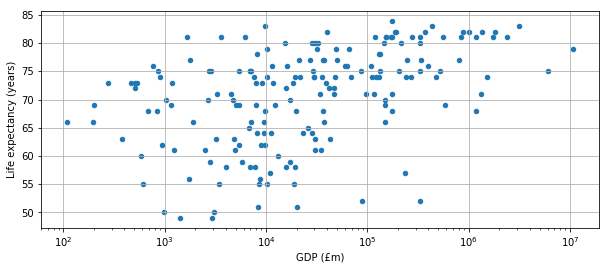

In [88]:
#Scatter plot to show the correlation of gdp and life expectancy
%matplotlib inline
gdpfinalvslifefinal.plot(x=GDP, y=LIFE, kind='scatter', grid=True, logx=True, figsize=(10, 4))

In [91]:
# the 10 countries with lowest GDP
gdpfinalvslifefinal.sort_values(GDP).head(10)

,country,GDP (£m),Life expectancy (years)
87,Kiribati,108,66
141,Sao Tome and Principe,195,66
111,"Micronesia, Fed. Sts.",202,69
168,Tonga,277,73
37,Comoros,383,63
157,St. Vincent and the Grenadines,461,73
140,Samoa,509,73
180,Vanuatu,512,72
65,Grenada,538,73
60,"Gambia, The",578,60


In [ ]:
# the 10 countries with lowest life expectancy
gdpfinalvslifefinal.sort_values(LIFE).head(10)

To sum up, there is no strong correlation between a country's wealth and the life expectancy of its inhabitants: there is often a wide variation of life expectancy for countries with similar GDP, countries with the lowest life expectancy are not the poorest countries, and countries with the highest expectancy are not the richest countries. Nevertheless there is some relationship, because the vast majority of countries with a life expectancy below 70 years is on the left half of the scatterplot.